The mean amount of black vertices =  18.7511


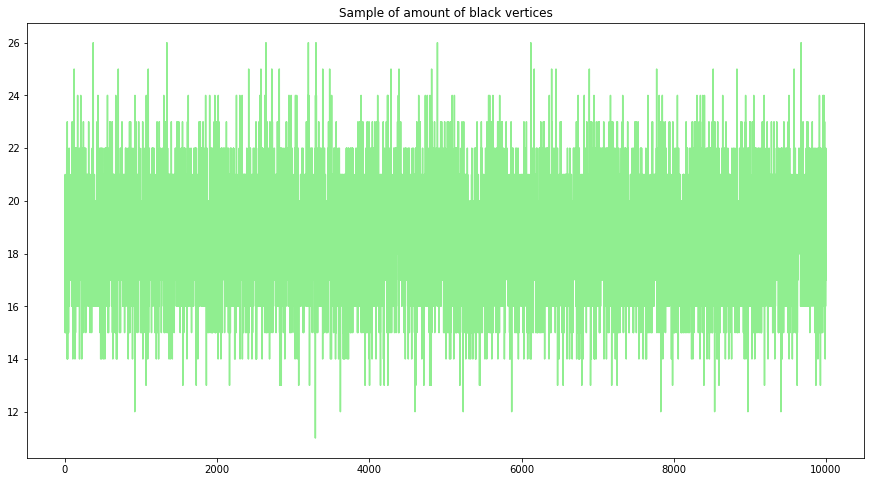

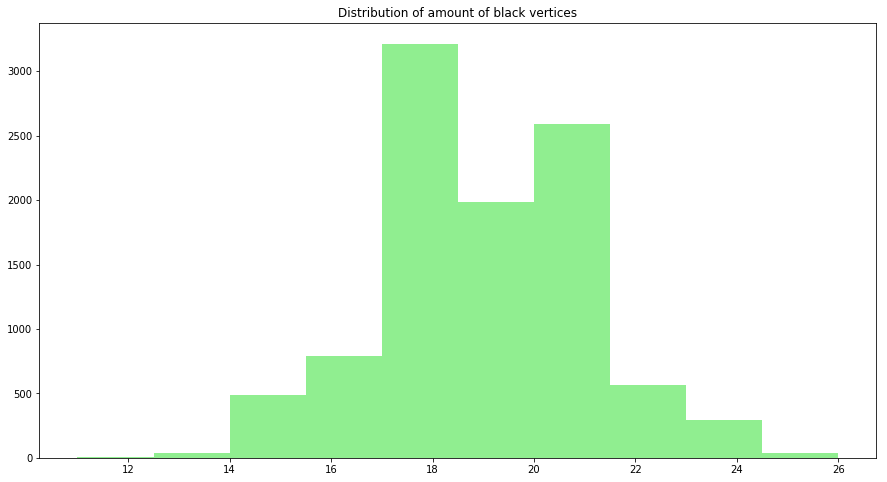

Ttest_indResult(statistic=0.6774184281107193, pvalue=0.49824758321903084)

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def g_test(x, start=0.1, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

def plot_grid(narr):
    '''Plots 2d lattice with vertices colored in black and red according to given mask.
    Vertice is colored black if narr[i, j] == True and red otherwise.
    
    Parameters
    ----------
    narr : 2d boolean ndarray
        Mask for vertices colors
    '''

    if narr.dtype != 'bool':
        raise ValueError('narr should be a boolean ndarray')
    colors = np.empty(narr.shape, dtype='U5')
    colors[:] = 'red'
    colors[narr] = 'black'
    x, y = np.indices((narr.shape))
    plt.scatter(x, y, c=colors.ravel())
    plt.show()
    
def metropolis(start, rec_start, value, proposal, niter, nburn = 0):
    '''Generic Metropolis scheme.
    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
        
    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    rec_current = rec_start
    post = [rec_current]
    for i in range(niter):
        proposed = proposal(current)
        rec_proposed = recolour(proposed, size)
        p = value(rec_proposed) / value(rec_current)
        if np.random.rand() < p:
            current = proposed
            rec_current = rec_proposed
        post.append(rec_current)
    return post[nburn:]
    
def amount_of_black_ver(a, size):
    s = 0
    for i in range(size):
        for j in range(size):
            if (a[i,j] == True):
                s += 1
    return s

def get_neighb(i, j, size):
    ind = [] 
    if ((0 <= i - 1 < size) and (0 <= j < size)):
        ind.append([i - 1, j])
    if ((0 <= i + 1 < size) and (0 <= j < size)):
        ind.append([i + 1, j])
    if ((0 <= i < size) and (0 <= j - 1 < size)):
        ind.append([i, j - 1])
    if ((0 <= i < size) and (0 <= j + 1 < size)):
        ind.append([i, j + 1])
    return ind

def recolour(arr, size):
    rec_arr = arr
    for i in range(size):
        for j in range(size):
            neighb = get_neighb(i,j,size)
            for k in range(len(neighb)):
                if (arr[neighb[k][0], neighb[k][1]] + arr[i,j] == 2):
                    rec_arr[neighb[k][0], neighb[k][1]] = 0
    return rec_arr
                    
def prop(cur, size):
    arr = (cur + np.random.choice([0, 1], size=size**2).reshape((size, size))) % 2
    return arr

    
size = 8
start = np.random.choice([0, 1], size=size**2).reshape((size, size))#.astype('bool')
rec_start = recolour(narr, size)
value = lambda x: amount_of_black_ver(x, size)
proposal = lambda x: prop(x, size)
post = metropolis(start, rec_start, value, proposal, 10000)

res = np.zeros(10000)
for i in range(10000):
    res[i] = value(post[i])
    
print("The mean amount of black vertices = ", res.mean())

plt.figure(figsize=(15,8))
plt.plot(res, color = 'lightgreen')
plt.title("Sample of amount of black vertices")
plt.show()

plt.figure(figsize=(15,8))
plt.hist(res, color = 'lightgreen')
plt.title("Distribution of amount of black vertices")
plt.show()

g_test(res)